# Sprawozdanie z MIO laboratorium 04 - Marcin Knapczyk

# Zadanie 1

Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję  Z(wTV,wradio,wprasa) . Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące i o pilnowaniu skali danych.

In [ ]:
import pandas as pd

data = pd.read_csv('Advertising.csv')
data.head(5)
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, 1:-1])
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[1:-1])
scaled_data["Sales"] = data["Sales"].values

scaled_data.head(5)
scaled_data.describe()

,TV,Radio,Newspaper,Sales
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,1.221245e-16,-4.529710e-16,2.220446e-16,14.022500
std,1.002509e+00,1.002509e+00,1.002509e+00,5.217457
min,-1.708823e+00,-1.570868e+00,-1.392646e+00,1.600000
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01,10.375000
50%,3.161515e-02,-2.457858e-02,-2.211368e-01,12.900000
75%,8.381955e-01,8.954299e-01,6.695788e-01,17.400000
max,1.744029e+00,1.778300e+00,3.841171e+00,27.000000


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

X = scaled_data.iloc[:, :-1]
y = scaled_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

activation_functions = ['relu', 'tanh']
layers_configs = [(128,), (64, 64), (32, 32, 32), (16, 16, 16, 16)]

for activation_function in activation_functions:
  for layers_config in layers_configs:

    network = MLPRegressor(hidden_layer_sizes=layers_config, activation=activation_function, solver='adam', max_iter = 1000, tol = 0.001)

    network.fit(X_train, y_train)

    y_pred = network.predict(X_test)

    score = network.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Network config: {layers_config}, {activation_function}")
    print(f"Score: {score:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {mse:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Network config: (128,), relu
Score: 0.9158
MSE: 2.6575
RMSE: 2.6575
Network config: (64, 64), relu
Score: 0.9802
MSE: 0.6236
RMSE: 0.6236
Network config: (32, 32, 32), relu
Score: 0.9813
MSE: 0.5915
RMSE: 0.5915
Network config: (16, 16, 16, 16), relu
Score: 0.9724
MSE: 0.8708
RMSE: 0.8708
Network config: (128,), tanh
Score: 0.9550
MSE: 1.4210
RMSE: 1.4210
Network config: (64, 64), tanh
Score: 0.9763
MSE: 0.7495
RMSE: 0.7495


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Network config: (32, 32, 32), tanh
Score: 0.9318
MSE: 2.1528
RMSE: 2.1528
Network config: (16, 16, 16, 16), tanh
Score: 0.5377
MSE: 14.5909
RMSE: 14.5909


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Wnioski:
* Najlepsze wyniki osiągnęła sieć w konfiguracji (32, 32, 32) z funkcją aktywacji relu, na poziomie: Score: 0.9813, MSE: 0.5915, RMSE: 0.5915
* Lepsze wyniki osiągnęły sieci o większej liczbie warstw
* Zastosowanie funkcji aktywacji relu wpływa pozytywnie na skuteczność działania sieci
* Sieci całkiem dobrze poradziły sobie z zadaniem aproksymacji

# Zadanie 2

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji  f(x)=sin(x)  w przedziale  [−2π,2π] . Proszę użyć  tanh  jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

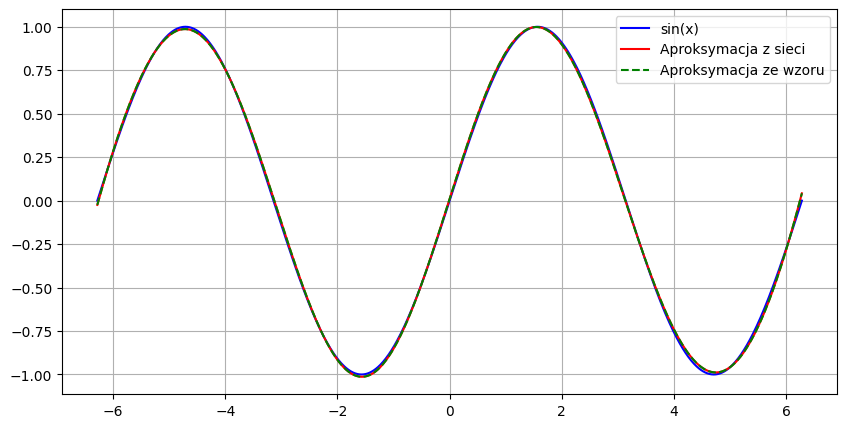

y = tanh(1.058 + 0.327 * tanh(-20.447x + 0.906) + -0.149 * tanh(-57.815x + 0.078) + 0.296 * tanh(-26.873x + -0.819))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = np.sin(X)

network = MLPRegressor(hidden_layer_sizes=(3), activation='tanh', solver='lbfgs', max_iter = 4000, tol=0.001, random_state=2)

network.fit(X.reshape(-1,1), y)

y_pred = network.predict(X.reshape(-1,1))

W1, b1 = network.coefs_[0], network.intercepts_[0]  # wagi i biasy warstwy ukrytej
W2, b2 = network.coefs_[1], network.intercepts_[1]  # wagi i biasy warstwy wyjściowej

# wzór funkcji aproksymującej
def approx_function(x):
    hidden_layer_output = np.tanh(np.dot(x.reshape(-1, 1), W1) + b1)
    return np.dot(hidden_layer_output, W2) + b2


y_approx_formula = approx_function(X)

plt.figure(figsize=(10, 5))
plt.plot(X, y, 'b', label="sin(x)")
plt.plot(X, y_pred, 'r', label="Aproksymacja z sieci")
plt.plot(X, y_approx_formula, 'g--', label="Aproksymacja ze wzoru")
plt.legend()
plt.grid()
plt.show()

print(f"y = tanh({network.intercepts_[1][0]:.3f}", end="")

for index in range(len(network.coefs_[0][0])):
    print(f" + {network.coefs_[0][0][index]:.3f} * tanh({network.coefs_[1][index][0]:.3f}x + {network.intercepts_[0][index]:.3f})", end="")

print(")")


## Wnioski
*   Sieć mimo małych rozmiarów (jedna warstwa ukryta z 3 neuronami) bardzo dobrze poradziła sobie z aproksymacją funkcji sinus
*   Kluczowe okazało się użycie solvera 'lbfgs' (Limited-memory BFGS)
*   Wykres funkcji aproksymującej jesst bardzo zbliżony do oryginalnej funkcji i niemal się z nią pokrywa

# Zadanie 3

Proszę o wykorzystanie rzeczywistego zbioru danych medycznych (diabetes) z biblioteki sklearn.datasets (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), w którym celem jest przewidywanie stopnia zaawansowania choroby cukrzycowej na podstawie zestawu cech opisujących pacjenta. Proszę przeskalować dane do jednej skali i podzielić je na dane uczące i testujące. Proszę zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich policzyć wyniki za pomocą MSE, MAPE i R^2. Dla najlepszego modelu proszę wykonać wykres porównujący wartości rzeczywiste (na osi X) i przewidywane (na osi Y). W idealnym przypadku powinny ułożyć się na prostej y=x.

Proszę skomentować, jak architektura sieci wpływa na aproksymację i zaproponować najmniejszą sieć, dla której wyniki są dla państwa zadowalające.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Network config: {'hidden_layer_sizes': (4,), 'activation': 'identity', 'solver': 'adam'}
MSE: 2979.9376, MAPE: 0.3708, R^2: 0.4607



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Network config: {'hidden_layer_sizes': (8,), 'activation': 'identity', 'solver': 'adam'}
MSE: 3024.0845, MAPE: 0.3640, R^2: 0.4527

Network config: {'hidden_layer_sizes': (16, 16, 16, 16), 'activation': 'identity', 'solver': 'adam'}
MSE: 3056.3642, MAPE: 0.3628, R^2: 0.4468

Network config: {'hidden_layer_sizes': (10, 10, 10, 10), 'activation': 'identity', 'solver': 'adam'}
MSE: 3045.0818, MAPE: 0.3639, R^2: 0.4489

Network config: {'hidden_layer_sizes': (32, 32, 32, 32), 'activation': 'identity', 'solver': 'adam'}
MSE: 3035.8266, MAPE: 0.3614, R^2: 0.4505

Network config: {'hidden_layer_sizes': (64, 64, 64, 64), 'activation': 'identity', 'solver': 'adam'}
MSE: 3033.4718, MAPE: 0.3629, R^2: 0.4510

Network config: {'hidden_layer_sizes': (20, 10), 'activation': 'identity', 'solver': 'adam'}
MSE: 3046.0483, MAPE: 0.3647, R^2: 0.4487

Network config: {'hidden_layer_sizes': (50, 20, 10), 'activation': 'identity', 'solver': 'adam'}
MSE: 3044.0928, MAPE: 0.3619, R^2: 0.4490

Network config: 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


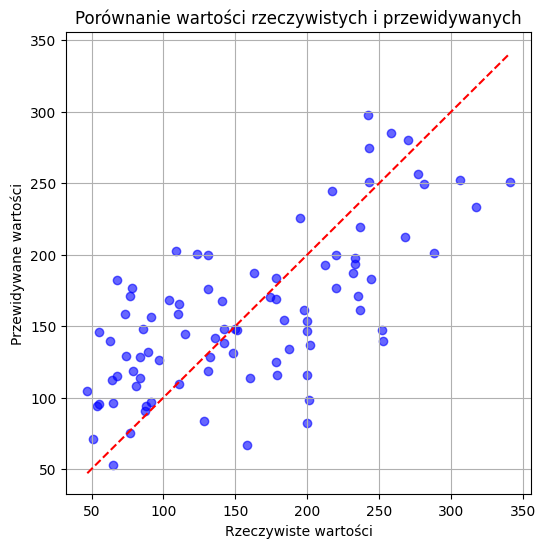

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

data = load_diabetes()
X, y = data.data, data.target

# skalowanie danych
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

# konfiguracje sieci
configs = [
    {"hidden_layer_sizes": (4,), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (8,), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (16, 16, 16, 16), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (10, 10, 10, 10), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (32, 32, 32, 32), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (64, 64, 64, 64), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (20, 10), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (50, 20, 10), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (100, 50, 20), "activation": "identity", "solver": "adam"},
    {"hidden_layer_sizes": (128, 64, 32), "activation": "identity", "solver": "adam"}
]

results = []

for config in configs:
    model = MLPRegressor(**config, max_iter=5000, learning_rate_init=0.001, random_state=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    print(f"Network config: {config}")
    print(f"MSE: {mse:.4f}, MAPE: {mape:.4f}, R^2: {r2:.4f}\n")

    results.append((config, mse, mape, r2))

# znalezienie najlepszej architektury
best_config = min(results, key=lambda x: x[1])  # najmniejsza wartość MSE

print("Najlepsza konfiguracja:", best_config[0])
print(f"MSE: {best_config[1]:.4f}, MAPE: {best_config[2]:.4f}, R^2: {best_config[3]:.4f}")

# wizualizacja wyników dla najlepszego modelu
best_model = MLPRegressor(**best_config[0], max_iter=5000, random_state=2)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # idealna linia y=x
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Porównanie wartości rzeczywistych i przewidywanych")
plt.grid()
plt.show()

## Wnioski
*   Najlepiej poradziła sobie konfiguracja (4), funkcja aktywacji identity, solver adam, z wynikami na poziomie MSE: 2979.9376, MAPE: 0.3708, R^2: 0.4607
* Najlepiej radzą sobie sieci o jednej warstwie ukrytej
* Funkcja aktywacji identity daje najlepsze wyniki
* Przy zwiększeniu liczby neuronów  w warstwie z 4 do 8, wynik sieci pogorsza się
* Żadnej z sieci nie udało się osiągnąć satysfakcjonującego wyniku (duże MSE)
* Wykres wartości rzeczywistych od przewidywanych jest daleki od linii prostej

# Zadanie 4

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

In [ ]:
from sklearn.neural_network import MLPRegressor

best_model = MLPRegressor(**best_config[0], max_iter=1, warm_start=True, random_state=2)

train_errors = []
test_errors = []
mape_errors = []
epochs = 5000

for epoch in range(epochs):
    best_model.fit(X_train, y_train)

    if epoch % 10 == 0:
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

        train_errors.append(train_mse)
        test_errors.append(test_mse)
        mape_errors.append(test_mape)

        if epoch % 500 == 0:
            print(f"Epoch {epoch}: Train MSE={train_mse:.4f}, Test MSE={test_mse:.4f}, Test MAPE={test_mape:.4f}")


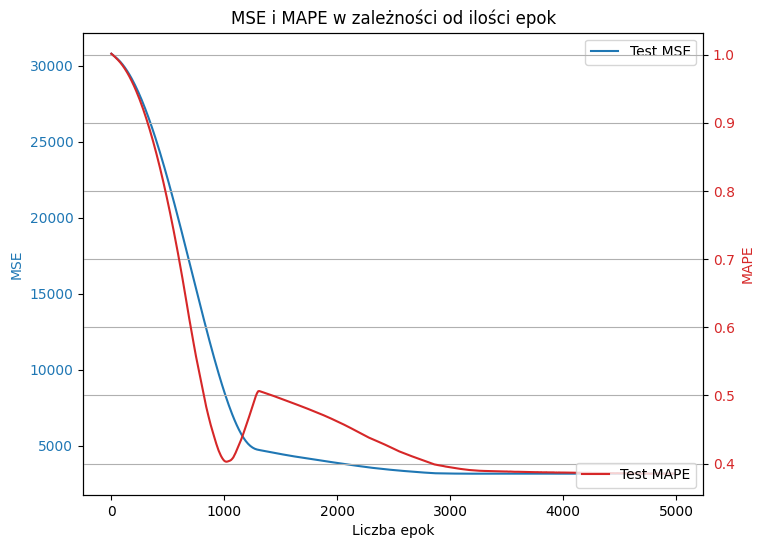

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel("Liczba epok")
ax1.set_ylabel("MSE", color='tab:blue')
ax1.plot(range(0, epochs, 10), test_errors, label="Test MSE", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc="upper right")

ax2 = ax1.twinx()
ax2.set_ylabel("MAPE", color='tab:red')
ax2.plot(range(0, epochs, 10), mape_errors, label="Test MAPE", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc="lower right")

plt.title("MSE i MAPE w zależności od ilości epok")
plt.grid()
plt.show()

## Wnioski
* Zarówno błąd średniokwadratowy (MSE) jak i średni procentowy błąd bezwzględny (MAPE) dla początkowych epok są bardzo wysokie
* Wartości MSE i MAPE spadają bardzo szybo do ~1200 epoki
* Od ~1200 epoki wykres wartości MSE spłaszcza się, a spadek maleje
* W pewnym momencie wykres wartości błędu MAPE odbija mocno do góry, po czym zaczyna spowrotem stopniowo maleć
* Liczba epok wpływa pozytywnie na zmniejszanie błędów MSE i MAPE, ale tylko do pewnego momentu
* Do końca (5000 epok) oba błędy pozostają na wysokim poziomie

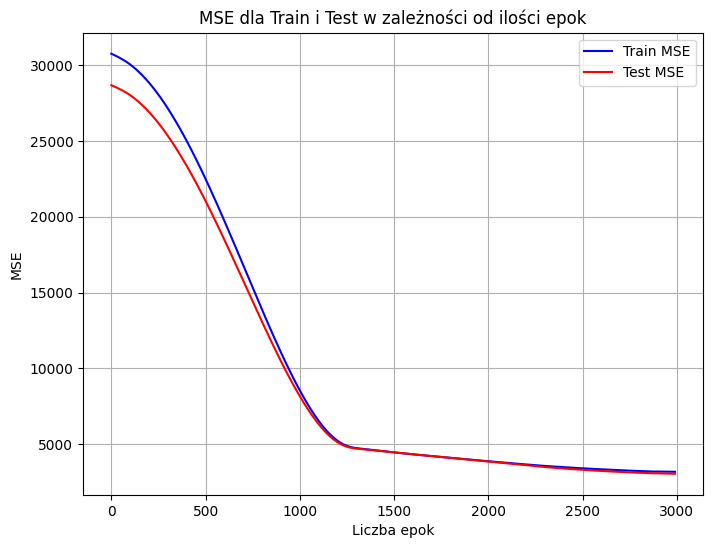

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Liczba epok")
ax.set_ylabel("MSE")

ax.plot(range(0, 3000, 10), test_errors[0:300], label="Train MSE", color='blue')
ax.plot(range(0, 3000, 10), train_errors[0:300], label="Test MSE", color='red')

ax.legend(loc="upper right")
plt.title("MSE dla Train i Test w zależności od ilości epok")
plt.grid()
plt.show()


## Wnioski

* Na początku błąd MSE jest wyższy dla danych testowych niż dla uczących
* Wraz z kolejnymi iteracjami uczenia sieci, obie wartości błędów spadają, a wartość MSE dla zbioru danych testowych osiąga niższy poziom niż dla zbioru danych uczących
* Wykres nie sugeruje zajścia zjawiska overfittingu, jako że MSE nie zaczyna rosnąć i osiąga poziom niższy dla danych testowych niż dla danych uczących

# Zadanie 5*

Można spróbować (już po normalizacji) zmniejszyć wymiarowość zbioru diabetes. Żeby to osiągnąć, opcją jest np. odrzucić pierwsze dwie kolumny, albo dokonać zmniejszenia wymiarowości powszechnie używanym algorytmem PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, w dokumentacji są przykłady użycia). Wtedy można zbadać jak zmieni się działanie sieci po takim zabiegu.

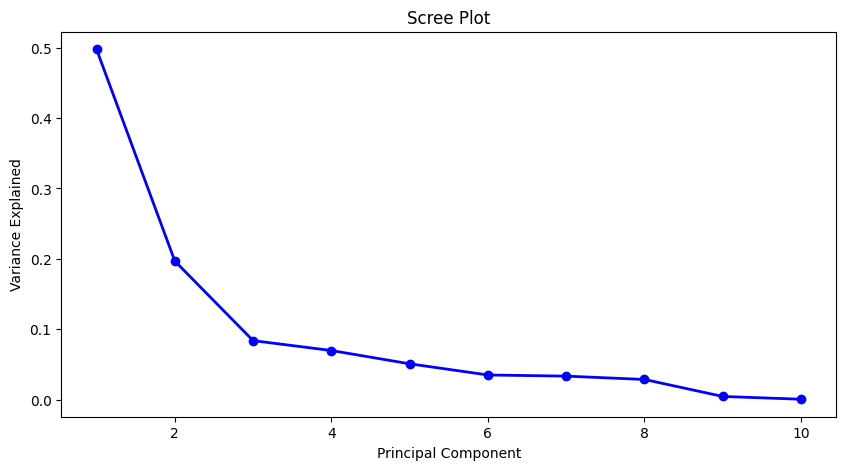

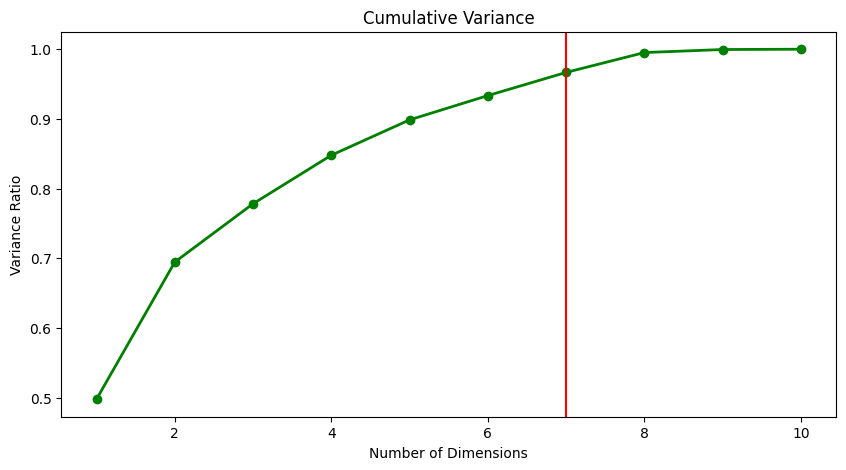

Liczba istotnych wymiarów: 7


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=10)

data_pca = pca.fit_transform(X_scaled)

data_pca = pd.DataFrame(data_pca, columns=["PC{}".format(n) for n in range(1, 11)])

PC_values = np.arange(pca.n_components_) + 1

# wykres głównych składowych względem wyjaśnionej wariancji
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')

# obliczanie skumulowanej sumy wyjaśnionej wariancji
cum_sum = np.cumsum(pca.explained_variance_ratio_)

# określenie punktu odcięcia (95% wyjaśnionej wariancji)
pca_dims = np.argmax(cum_sum >= 0.95) + 1

# wykres liczby głównych składowych względem skumulowanej wariancji z linią odcięcia
fig, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(range(1,11), cum_sum, 'o-', linewidth=2, color='green')
ax2.axvline(x=pca_dims, color='r')

ax2.set_title('Cumulative Variance')
ax2.set_xlabel('Number of Dimensions')
ax2.set_ylabel('Variance Ratio')
plt.show()

print("Liczba istotnych wymiarów: " + str(pca_dims))


## Wnioski

* Analiza komponentów bazowych (PCA) wykazała, że można skutecznie zmniejszyć wymiarowość zbioru danych
* Scree Plot pokazuje, że po transformacji danych pierwszych kilka wymiarów odpowiada za zdecydowaną większość wariancji zbioru
* Wykres skumulowanej wariancji pozwolił wyznaczyć liczbę najistotniejszych wymiarów
* Siedem pierwszych wymiarów danych po transformacji odpowiada za 95% wariancji wśród zbioru

Network config: {'hidden_layer_sizes': (4,), 'activation': 'identity', 'solver': 'adam'}
MSE: 2941.3551, MAPE: 0.3737, R^2: 0.4676


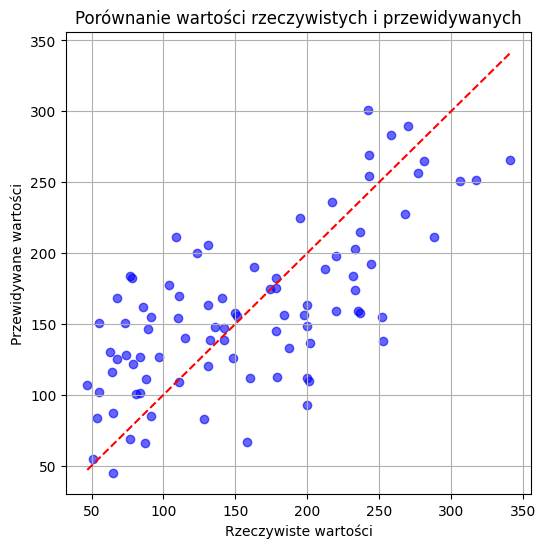

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

X_pca = data_pca.iloc[:, 0:pca_dims]

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2)

# wizualizacja wyników dla najlepszego modelu
best_model = MLPRegressor(**best_config[0], max_iter=5000, random_state=2)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_best)
mape = mean_absolute_percentage_error(y_test, y_pred_best)
r2 = best_model.score(X_test, y_test)
print(f"Network config: {best_config[0]}")
print(f"MSE: {mse:.4f}, MAPE: {mape:.4f}, R^2: {r2:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # idealna linia y=x
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Porównanie wartości rzeczywistych i przewidywanych")
plt.grid()
plt.show()

## Wnioski
* Zmniejszenie wymiarowości pozwoliło poprawić wynik aproksymacji
* Poprawie uległa metryka błędu MSE i metryka R^2
* Wskaźnik MAPE uległ zaś pogorszeniu
* Zmniejszenie wymiarowości danych za pomocą PCA pozwala na polepszenie wyników działania sieci neuronowej
* W przypadku tego zbioru nie jest to jednak duża poprawa, a wyniki nadal pozostają mało satysfakcjonujące

In [ ]:
!jupyter nbconvert --to html /content/MIO_lab04_report.ipynb

[NbConvertApp] Converting notebook /content/MIO_lab04_report.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 723183 bytes to /content/MIO_lab04_report.html
